# Univariat Time Series Forcasting using ARIMA & SARIMAX

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
df = pd.read_csv(r"C:\Users\Akash\Desktop\python\time series/Grocery-Store-Sales-Time-Series-Dataset.csv",parse_dates=True,index_col="Date")
df

,Sales
Date,
2021-01-01,63473.0
2021-02-01,57967.0
2021-03-01,63609.0
2021-04-01,62593.0
2021-05-01,66993.0
2021-06-01,65591.0
2021-07-01,67853.0
2021-08-01,67414.0
2021-09-01,65925.0


In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(51, 1)

In [6]:
df.head(10)

,Sales
Date,
2021-01-01,63473.0
2021-02-01,57967.0
2021-03-01,63609.0
2021-04-01,62593.0
2021-05-01,66993.0
2021-06-01,65591.0
2021-07-01,67853.0
2021-08-01,67414.0
2021-09-01,65925.0


In [7]:
df.tail(10)

,Sales
Date,
2024-06-01,73686.0
2024-07-01,75931.0
2024-08-01,75923.0
2024-09-01,72532.0
2024-10-01,75667.0
2024-11-01,76232.0
2024-12-01,78601.0
2025-01-01,76065.0
2025-02-01,69314.0


#### Checking stationarity of given series

- Mean and Variance should be constant over time.

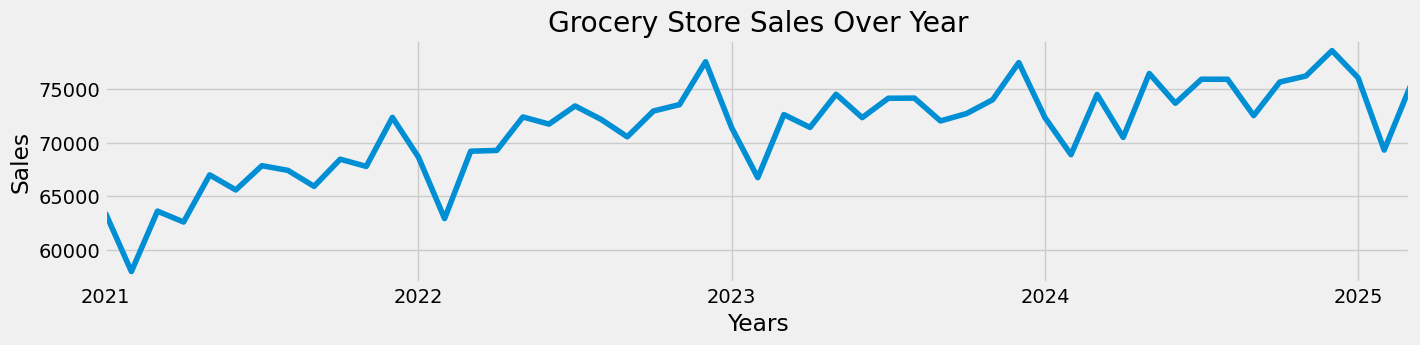

In [8]:
plt.figure(figsize=(15,3))
df["Sales"].plot()
plt.title("Grocery Store Sales Over Year")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.show()


#### How to make series stationary?

- Use differencing technique

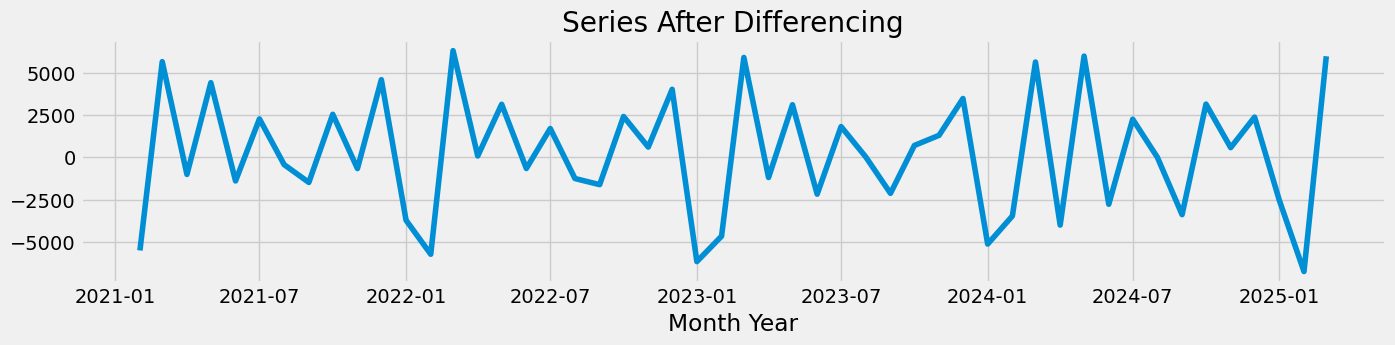

In [9]:
df1=df.diff()
df1.dropna(inplace=True)

plt.figure(figsize=(15,3))
plt.plot(df1["Sales"])
plt.title("Series After Differencing")
plt.xlabel("Month Year")
plt.show()

In [10]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

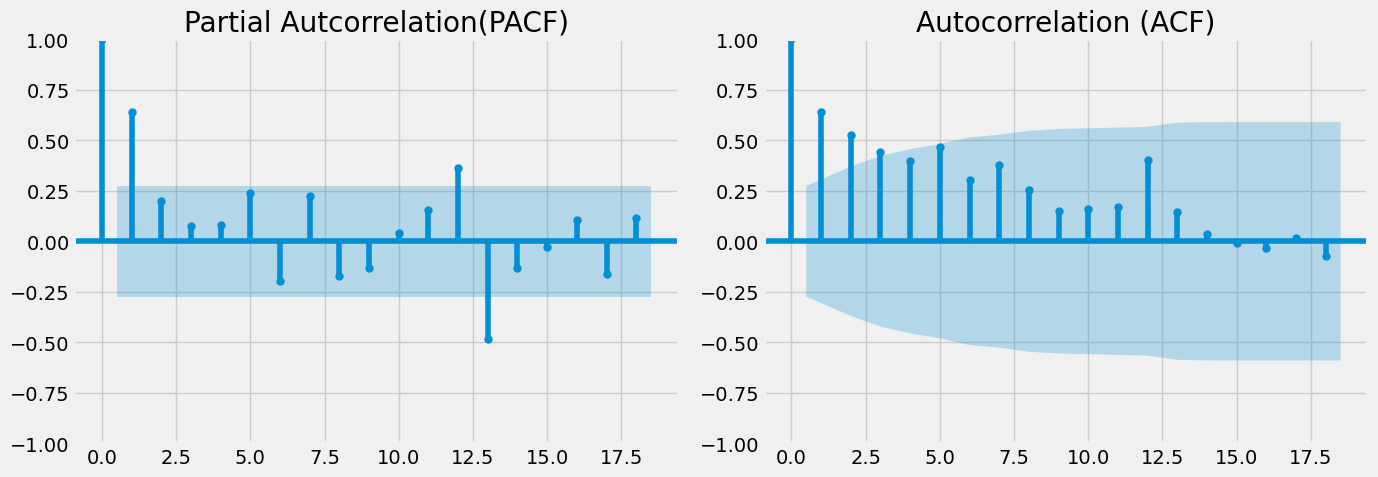

In [11]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
plot_pacf(df["Sales"],ax=ax[0])
ax[0].set_title("Partial Autcorrelation(PACF)")

plot_acf(df["Sales"],ax=ax[1])
ax[1].set_title("Autocorrelation (ACF)")

plt.tight_layout()
plt.show()

In [12]:
train_df=df[:-12]
test_df = df[-12:]

# Building ARIMA Model on Traning Data

In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
model_arima = ARIMA(train_df,order=(1,1,1))

model_fit = model_arima.fit()

C:\Users\Akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -363.220
Date:                Tue, 25 Nov 2025   AIC                            732.439
Time:                        17:45:52   BIC                            737.352
Sample:                    01-01-2021   HQIC                           734.187
                         - 03-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.031     32.145      0.000       0.939       1.061
ma.L1         -0.9997      0.331     -3.017      0.003      -1.649      -0.350
sigma2      1.171e+07   3.11e-08   3.77e+14      0.0

In [16]:
len(train_df)

39

In [17]:
#forcasting the next 12 Months
n_forecast = 12

predict = model_fit.predict(start=len(train_df),end=len(train_df) + n_forecast - 1)

predict.rename("predicted",inplace=True)

predict

2024-04-01    74709.319068
2024-05-01    74912.635158
2024-06-01    75115.948270
2024-07-01    75319.258403
2024-08-01    75522.565558
2024-09-01    75725.869735
2024-10-01    75929.170934
2024-11-01    76132.469154
2024-12-01    76335.764397
2025-01-01    76539.056661
2025-02-01    76742.345948
2025-03-01    76945.632256
Freq: MS, Name: predicted, dtype: float64

In [18]:
pred_df = pd.DataFrame(predict)

pred_df.columns=["predicted_sales"]

pred_df["predicted_sales"]= round(pred_df["predicted_sales"],0)

pred_df

,predicted_sales
2024-04-01,74709.0
2024-05-01,74913.0
2024-06-01,75116.0
2024-07-01,75319.0
2024-08-01,75523.0
2024-09-01,75726.0
2024-10-01,75929.0
2024-11-01,76132.0
2024-12-01,76336.0
2025-01-01,76539.0


In [19]:
actual_vs_pred = pd.concat([test_df,pred_df],axis=1)

actual_vs_pred["error"]=actual_vs_pred["Sales"]-actual_vs_pred["predicted_sales"]

actual_vs_pred.rename(columns={"Sales":"actual_sales"},inplace=True)

actual_vs_pred


,actual_sales,predicted_sales,error
2024-04-01,70496.0,74709.0,-4213.0
2024-05-01,76465.0,74913.0,1552.0
2024-06-01,73686.0,75116.0,-1430.0
2024-07-01,75931.0,75319.0,612.0
2024-08-01,75923.0,75523.0,400.0
2024-09-01,72532.0,75726.0,-3194.0
2024-10-01,75667.0,75929.0,-262.0
2024-11-01,76232.0,76132.0,100.0
2024-12-01,78601.0,76336.0,2265.0
2025-01-01,76065.0,76539.0,-474.0


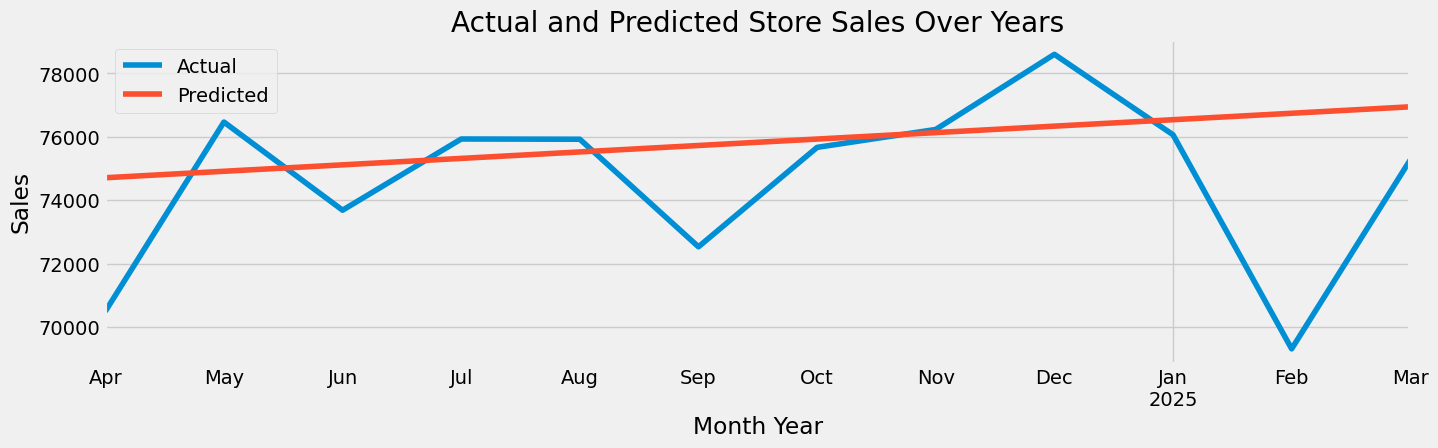

In [20]:
plt.figure(figsize=(15,4))
actual_vs_pred["actual_sales"].plot()
actual_vs_pred["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales Over Years")
plt.xlabel("Month Year")
plt.ylabel("Sales")
plt.legend(["Actual","Predicted"])
plt.show()

# Building SARIMAX Model on Traning Data

In [21]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [25]:
from pmdarima import auto_arima

auto_arima_result=auto_arima(train_df,seasonal=True,m=12)

In [27]:
print(auto_arima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   39
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -212.937
Date:                              Tue, 25 Nov 2025   AIC                            431.875
Time:                                      17:46:47   BIC                            435.649
Sample:                                  01-01-2021   HQIC                           432.962
                                       - 03-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5061      2.246     -0.225      0.822      -4.909       3.896
ma.S.L12       0.58

In [28]:
auto_arima_result.order,auto_arima_result.seasonal_order

((0, 1, 0), (1, 1, 1, 12))

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
model_sarimax=SARIMAX(train_df,order=auto_arima_result.order,seasonal_order=auto_arima_result.seasonal_order)

model_fit=model_sarimax.fit()

C:\Users\Akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akash\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [35]:
n_forecast=12

pred_values=model_fit.predict(start=len(train_df),end=len(train_df)+n_forecast-1)

pred_values = pred_values.rename("predicted",inplace=True)

pred_df= pd.DataFrame(pred_values)

pred_df["predicted"]=round(pred_df["predicted"],0)

pred_df

,predicted
2024-04-01,73143.0
2024-05-01,76347.0
2024-06-01,73994.0
2024-07-01,75861.0
2024-08-01,76011.0
2024-09-01,73825.0
2024-10-01,74415.0
2024-11-01,75698.0
2024-12-01,79199.0
2025-01-01,73506.0


In [44]:
actual_vs_pred_df = pd.concat([test_df, pred_df], axis=1)

# First rename the columns
actual_vs_pred_df.rename(columns={"Sales": "actual_sales", "predicted": "predicted_sales"}, inplace=True)

# Then calculate the error using the renamed columns
actual_vs_pred_df["error"] = actual_vs_pred_df["actual_sales"] - actual_vs_pred_df["predicted_sales"]

actual_vs_pred_df

,actual_sales,predicted_sales,error
2024-04-01,70496.0,73143.0,-2647.0
2024-05-01,76465.0,76347.0,118.0
2024-06-01,73686.0,73994.0,-308.0
2024-07-01,75931.0,75861.0,70.0
2024-08-01,75923.0,76011.0,-88.0
2024-09-01,72532.0,73825.0,-1293.0
2024-10-01,75667.0,74415.0,1252.0
2024-11-01,76232.0,75698.0,534.0
2024-12-01,78601.0,79199.0,-598.0
2025-01-01,76065.0,73506.0,2559.0


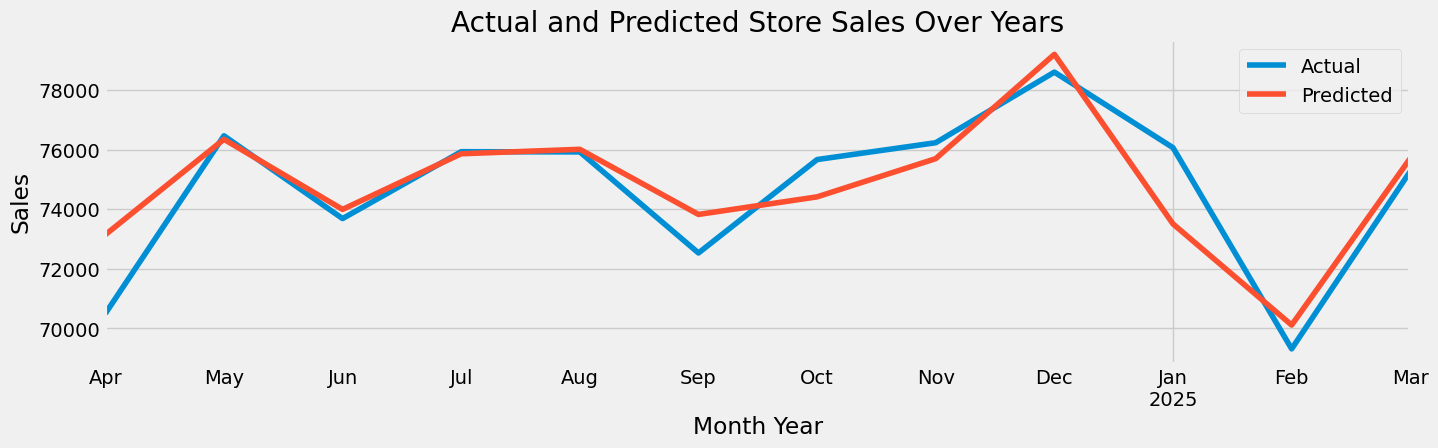

In [48]:
plt.figure(figsize=(15,4))
actual_vs_pred_df["actual_sales"].plot()
actual_vs_pred_df["predicted_sales"].plot()
plt.title("Actual and Predicted Store Sales Over Years")
plt.xlabel("Month Year")
plt.ylabel("Sales")
plt.legend(["Actual","Predicted"])
plt.show()

In [49]:
auto_arima_result=auto_arima(df,seasonal=True,m=12)

In [50]:
print(auto_arima_result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   51
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -325.575
Date:                            Tue, 25 Nov 2025   AIC                            657.151
Time:                                    18:09:52   BIC                            662.064
Sample:                                01-01-2021   HQIC                           658.899
                                     - 03-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0399      0.134      0.297      0.767      -0.223       0.303
ar.S.L24      -0.0585      0.058   

In [52]:
model_sarimax= SARIMAX(df,order=auto_arima_result.order,seasonal_order=auto_arima_result.seasonal_order)

model_fit=model_sarimax.fit()



C:\Users\Akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Akash\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [53]:
n_forecast=12

pred_values=model_fit.predict(start=len(df),end=len(df)+n_forecast-1)

pred_values = pred_values.rename("predicted",inplace=True)

pred_df= pd.DataFrame(pred_values)

pred_df["predicted"]=round(pred_df["predicted"],0)

pred_df

,predicted
2025-04-01,71227.0
2025-05-01,77313.0
2025-06-01,74598.0
2025-07-01,76854.0
2025-08-01,76771.0
2025-09-01,73360.0
2025-10-01,76692.0
2025-11-01,77188.0
2025-12-01,79545.0
2026-01-01,77051.0


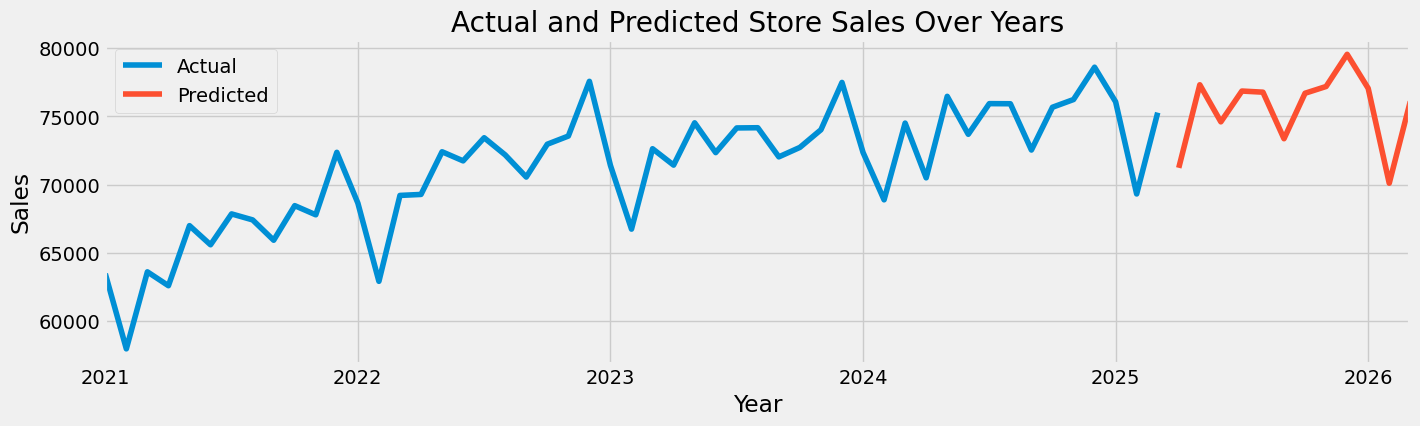

In [55]:
plt.figure(figsize=(15,4))
df["Sales"].plot(legend=True,label="Actual")
pred_df["predicted"].plot(legend=True,label="Predicted")
plt.title("Actual and Predicted Store Sales Over Years")
plt.xlabel("Year")
plt.ylabel("Sales")

plt.show()